# Solving an ordinary differential equation

Equation:
$$
    y'(x) + (x + A(x)) y(x) - x^3 - 2 x - A(x) x^2, \qquad
    \text{with } A(x) = \frac{1 + 3 x^2}{1 + x + x^3}.
$$
Boundary condition:
$$
    y(0) = 1
$$

In [1]:
%%capture
!pip install elvet

## Computation

Using `elvet`'s differential equation-solver function `solver`.

In [1]:
import elvet

def equation(x, y, dy):
    A = (1 + 3*x**2) / (1 + x + x**3)
    return dy + (x + A) * y - x**3 - 2*x - x**2 * A

bc = elvet.BC(0, lambda x, y, dy: y - 1)
domain = elvet.box((0, 2, 100))

result = elvet.solver(equation, bc, domain, model=elvet.nn(1, 10, 1), epochs=50000)

 Elvet: epoch = 1, loss = 6.04e+01, elapsed time = 00:00:01
 Elvet: epoch = 10000, loss = 6.08e-03, elapsed time = 00:00:06
 Elvet: epoch = 20000, loss = 1.04e-04, elapsed time = 00:00:12
 Elvet: epoch = 30000, loss = 7.20e-05, elapsed time = 00:00:18
 Elvet: epoch = 40000, loss = 6.23e-05, elapsed time = 00:00:23
 Elvet: epoch = 50000, loss = 5.36e-05, elapsed time = 00:00:29


## Checks

Plot the history of values of the loss, the predictions (compared with the analytical solution), and the loss density (the contribution of each point in the domain to the total loss).

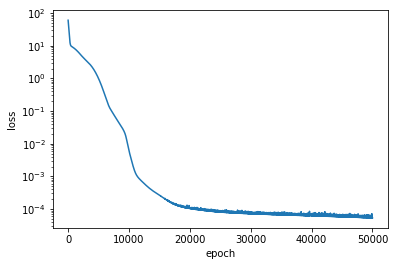

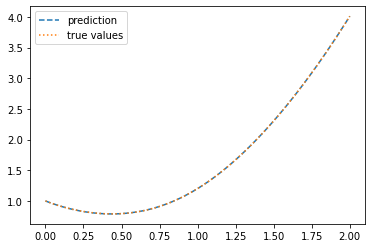

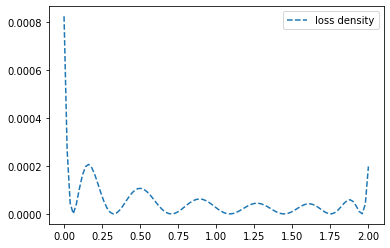

In [2]:
import numpy as np
import elvet.plotting

y_truth  = lambda x: np.exp(-0.5 * x**2) / (1 + x + x**3) + x**2

elvet.plotting.plot_losses(result)
elvet.plotting.plot_prediction(result, true_function=y_truth)
elvet.plotting.plot_loss_density(result)